In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_data_dir = '/srv/scratch/z5370003/projects/data'
data_dir = os.path.join(base_data_dir, 
                        'groundwater/FEFLOW/coastal/',
                         'variable_density/')
all_data_dir = os.path.join(data_dir, 'all')

In [3]:
ts_files = os.listdir(all_data_dir)
ts_files = sorted(ts_files)

In [4]:
res_df = pd.read_csv(os.path.join(all_data_dir, ts_files[0]))
res_df.columns

Index(['node', 'ts', 'time (d)', 'X', 'Y', 'Z', 'slice', 'mass_concentration',
       'pressure', 'head'],
      dtype='object')

In [5]:
origin = res_df[['X', 'Y', 'Z']].min().values
origin

array([ 3.55702399e+05,  6.45601344e+06, -4.00000000e+01])

Text(0.5, 0, 'Z')

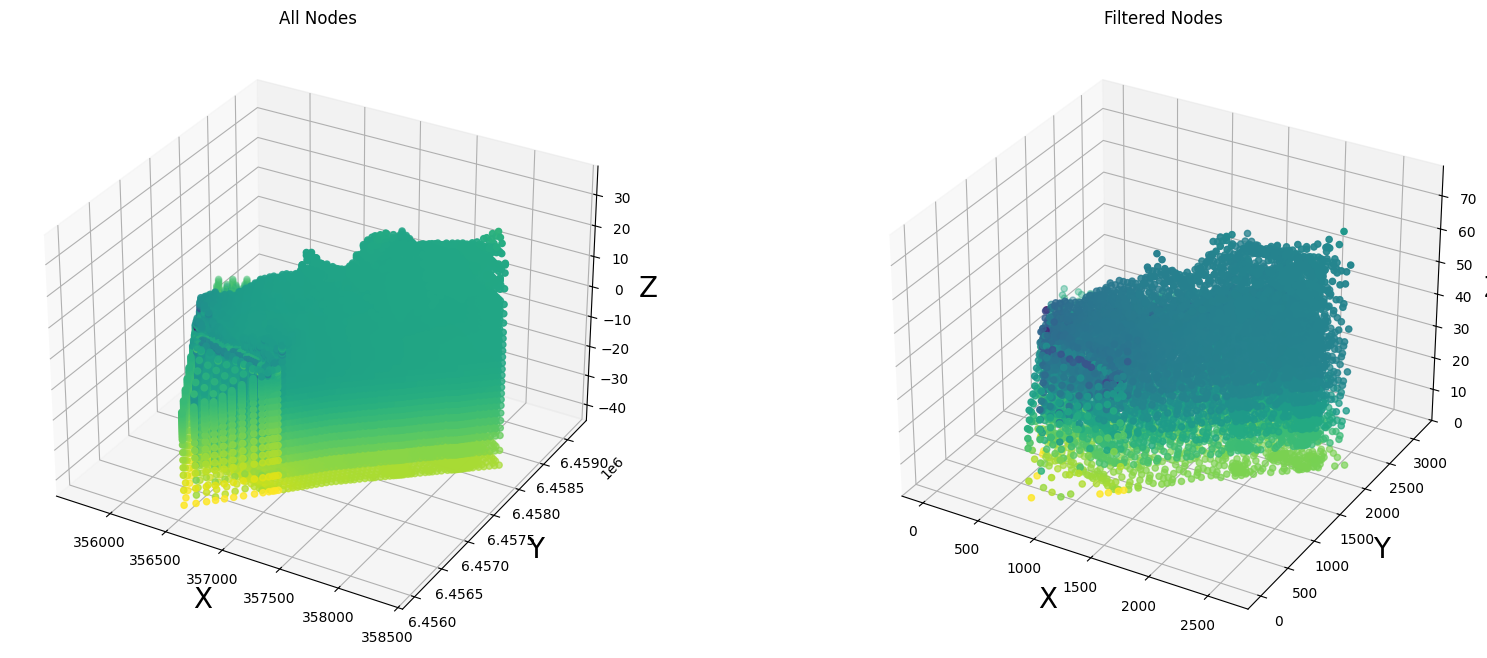

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), subplot_kw=dict(projection='3d'))



ax[0].scatter(res_df.X, res_df.Y, res_df.Z, c=res_df['head'])
ax[0].set_title('All Nodes')
ax[0].set_xlabel('X', fontsize=16)
ax[0].set_ylabel('Y', fontsize=16)
ax[0].set_zlabel('Z', fontsize=16)


skip_idx = res_df.index[::3]
skip_df = res_df.iloc[skip_idx]

skip_df.loc[:, ['X', 'Y', 'Z']] =  skip_df.loc[:, ['X', 'Y', 'Z']] - origin

skip_df = skip_df.loc[skip_df.slice.isin(range(1, 27, 2))]  

ax[1].scatter(skip_df.X, skip_df.Y, skip_df.Z, c=skip_df['head'])
ax[1].set_title('Filtered Nodes')
ax[1].set_xlabel('X', fontsize=20)
ax[1].set_ylabel('Y', fontsize=20)
ax[1].set_zlabel('Z', fontsize=20)


In [7]:
res_df.shape, skip_df.shape

((61360, 10), (10227, 10))

In [11]:
filter_dir = os.path.join(data_dir, 'filter')
os.makedirs(filter_dir, exist_ok=True)

In [13]:
for ts_file in ts_files[::2]:
    res_df = pd.read_csv(os.path.join(all_data_dir, ts_file))
    skip_idx = res_df.index[::3]
    skip_df = res_df.iloc[skip_idx]
    skip_df.loc[:, ['X', 'Y', 'Z']] =  skip_df.loc[:, ['X', 'Y', 'Z']]
    skip_df = skip_df.loc[skip_df.slice.isin(range(1, 27, 2))]
    skip_df.to_csv(os.path.join(filter_dir, ts_file), index=False)

In [18]:
len(os.listdir(filter_dir))

955